## Calories prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
exercise = pd.read_csv("exercise.csv")
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [3]:
calories = pd.read_csv("calories.csv")
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
df = pd.merge(exercise,calories,on = 'User_ID')



In [5]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
df = df.reset_index()

In [7]:
df.head()

,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [8]:
df.describe()

,index,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,4330.271354,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,0.000000,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,3749.750000,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,7499.500000,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,11249.250000,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,14999.000000,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
df.isnull().sum()

index         0
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
df.columns

Index(['index', 'User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [11]:
df = df.drop(['index','User_ID'],axis=1)


In [12]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Heart_Rate'}>,
        <AxesSubplot:title={'center':'Body_Temp'}>],
       [<AxesSubplot:title={'center':'Calories'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

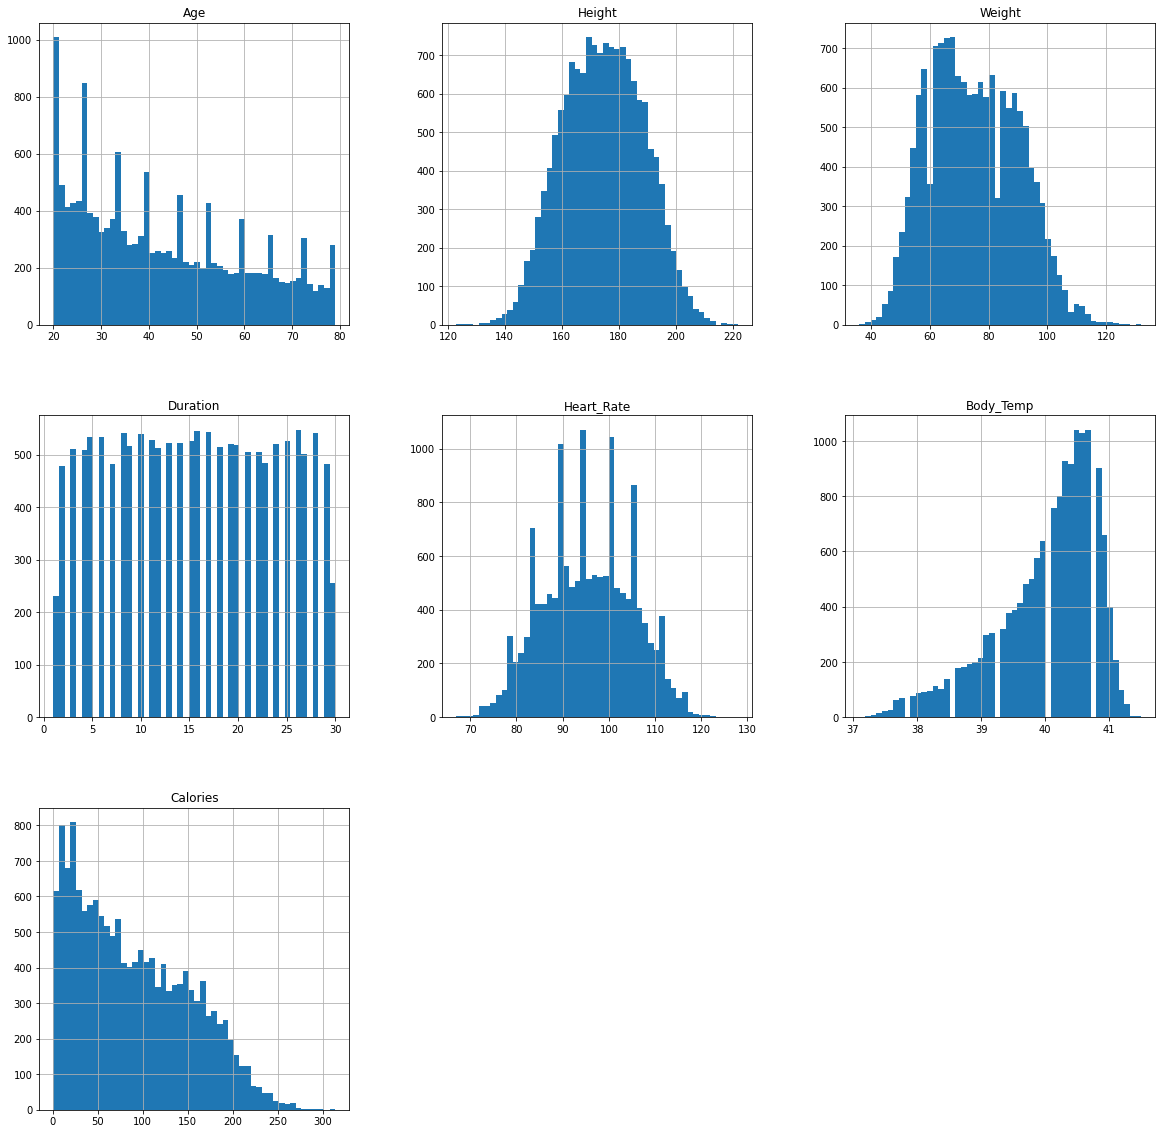

In [13]:
df.hist(figsize=(20,20),bins=50)

C:\Users\korla\Anaconda3\envs\TF\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

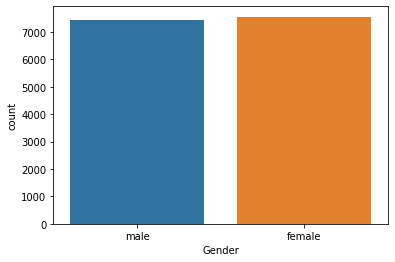

In [14]:
sns.countplot('Gender',data=df)

<AxesSubplot:>

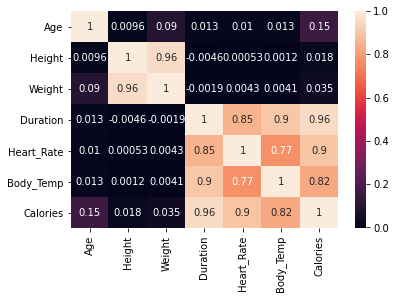

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
a = pd.get_dummies(df['Gender'],drop_first=True)

In [17]:
df = df.drop(['Gender'],axis=1)

In [18]:
df = pd.concat([df,a],axis=1)

In [19]:
df.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,0


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(['Calories'],axis=1)
y = df['Calories']

In [24]:
X.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,male
0,68,190.0,94.0,29.0,105.0,40.8,1
1,20,166.0,60.0,14.0,94.0,40.3,0
2,69,179.0,79.0,5.0,88.0,38.7,1
3,34,179.0,71.0,13.0,100.0,40.5,0
4,27,154.0,58.0,10.0,81.0,39.8,0


In [25]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
X_train.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,male
655,41,186.0,87.0,14.0,100.0,40.3,1
12044,20,162.0,59.0,18.0,95.0,40.6,0
14844,52,159.0,62.0,23.0,99.0,40.4,0
13985,31,171.0,70.0,5.0,83.0,39.0,0
7974,52,182.0,86.0,28.0,104.0,40.3,1


In [28]:
X_train = sc.fit_transform(X_train)

In [29]:
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression


In [31]:
reg = LinearRegression()

In [32]:
reg.fit(X_train,y_train)

LinearRegression()

In [33]:
reg.intercept_

88.92606965174122

In [34]:
reg.coef_


array([  8.454178  ,  -2.55851331,   4.46835811,  55.08100374,
        19.04838933, -13.25305251,  -0.68863289])

In [35]:
from sklearn.metrics import r2_score

In [36]:
y_train_pred = reg.predict(X_train)

In [37]:
c=pd.DataFrame({"actual":y_train,'predict':y_train_pred})
c.head()

,actual,predict
655,81.0,83.552072
12044,87.0,81.845996
14844,133.0,143.727756
13985,18.0,6.131271
7974,193.0,190.121164


In [38]:
r2_score(y_train,y_train_pred)

0.9676004204744925

In [40]:
reg.score(X_test,y_test)

0.9663701348612176

In [41]:
import pickle 

In [43]:
with open("calories.pkl" , 'wb') as f:
    pickle.dump(reg,f)

In [44]:
model = pickle.load(open("calories.pkl" , "rb"))

In [46]:
X.columns

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'male'],
      dtype='object')

In [50]:
model.predict([[1,2,3,4,5,6,7]])

336.8955116570863

In [52]:
model.predict([[1,2,3,4,5,6,7]])[0]

336.8955116570863

In [53]:
a = 1
import numpy as np 
print(np.array(a))

1
